# ACM 650 (Nintendo)
## Entire Python program for CRR model and Log normal model 
### By Harsha Kankanamge  Matthew Whittaker

### Data download directly Yahoo finance

In [1]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime 

ntdoy = pdr.get_data_yahoo('NTDOY', 
                          start=datetime.datetime(1996, 11, 18), # get the data directly from yahoo finance using python module
                          end=datetime.datetime(2018, 11, 27))
Current_price=ntdoy['Adj Close'][-1:]
Current_price=int(Current_price)
ntdoy[:10] # Showing first 10 data rows 
ntdoy[-10:] # Showing last 10 data rows

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-14,39.110001,38.419998,39.110001,38.669998,196500.0,38.669998
2018-11-15,38.750000,38.110001,38.299999,38.520000,424100.0,38.520000
2018-11-16,36.299999,34.959999,35.150002,36.000000,611600.0,36.000000
2018-11-19,36.779999,36.000000,36.779999,36.139999,373000.0,36.139999
2018-11-20,34.400002,33.900002,34.250000,33.950001,564400.0,33.950001
2018-11-21,35.029999,34.110001,34.509998,34.820000,545500.0,34.820000
2018-11-23,35.139999,34.599998,34.950001,35.029999,184800.0,35.029999
2018-11-26,36.349998,35.939999,36.110001,36.189999,270100.0,36.189999
2018-11-27,36.209999,35.810001,36.209999,36.099998,182500.0,36.099998


### Last 10 rows

In [59]:
ntdoy[-10:]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-14,39.110001,38.419998,39.110001,38.669998,196500.0,38.669998
2018-11-15,38.750000,38.110001,38.299999,38.520000,424100.0,38.520000
2018-11-16,36.299999,34.959999,35.150002,36.000000,611600.0,36.000000
2018-11-19,36.779999,36.000000,36.779999,36.139999,373000.0,36.139999
2018-11-20,34.400002,33.900002,34.250000,33.950001,564400.0,33.950001
2018-11-21,35.029999,34.110001,34.509998,34.820000,545500.0,34.820000
2018-11-23,35.139999,34.599998,34.950001,35.029999,184800.0,35.029999
2018-11-26,36.349998,35.939999,36.110001,36.189999,270100.0,36.189999
2018-11-27,36.209999,35.810001,36.209999,36.099998,182500.0,36.099998


In [6]:
Ldelta=0.01124408 # Compounded dividend rate
r=0.0221    # Define the interest rate

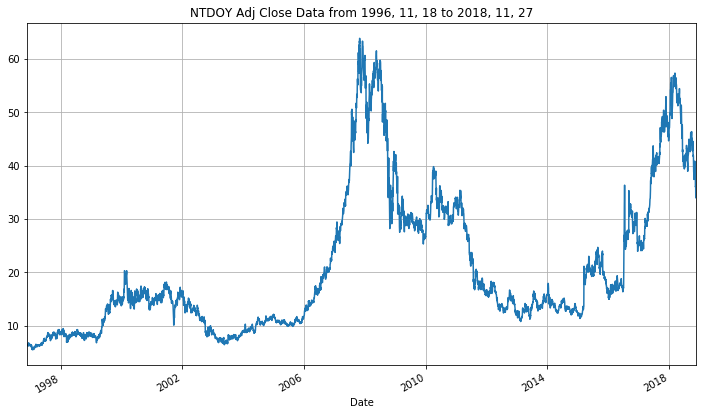

In [35]:
plt.rcParams['figure.figsize'] = (12.0, 7.0)
ntdoy['Adj Close'].plot(grid=True)
plt.title('NTDOY Adj Close Data from 1996, 11, 18 to 2018, 11, 27')
plt.show()


### Volatility Calculation
#### Directly download the data from Yahoo finance to calculate the volatility

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import arch

from statsmodels.graphics.tsaplots import plot_acf
yf.pdr_override()
class stock_vol:

    def __init__(self, tk, start, end):
        self.tk = tk
        self.start = start
        self.end = end
        all_data = pdr.get_data_yahoo(self.tk, start=self.start, end=self.end)
        self.stock_data = pd.DataFrame(all_data['Adj Close'], columns=['Adj Close'])
        self.stock_data["log"] = np.log(self.stock_data)-np.log(self.stock_data.shift(1))

    def mean_sigma(self):
        st = self.stock_data["log"].dropna().ewm(span=252).std()
        sigma = st.iloc[-1]
        return sigma


if __name__ == "__main__":
    vol = stock_vol("NTDOY", start="1996-11-18", end="2018-11-27")
    test = vol.stock_data["log"].dropna()
    print(test)
    

C:\Users\khmad\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[*********************100%***********************]  1 of 1 downloaded
Date
1996-11-19    0.000000
1996-11-20    0.006921
1996-11-21   -0.006921
1996-11-22    0.013794
1996-11-25    0.000000
1996-11-26    0.013606
1996-11-27    0.000000
1996-11-29   -0.020479
1996-12-02   -0.035091
1996-12-03    0.014185
1996-12-04    0.013986
1996-12-05    0.013794
1996-12-06    0.013606
1996-12-09    0.006734
1996-12-10    0.033006
1996-12-11   -0.026317
1996-12-12   -0.013423
1996-12-13   -0.041385
1996-12-16    0.041385
1996-12-17    0.000000
1996-12-18   -0.013606
1996-12-19    0.000000
1996-12-20    0.013606
1996-12-23   -0.041385
1996-12-24    0.041385
1996-12-26   -0.013606
1996-12-27    0.000000
1996-12-30    0.000000
1996-12-31    0.000000
1997-01-02    0.000000
                ...   
2018-10-16    0.021780
2018-10-17   -0.010377
2018-10-18   -0.015309
2018-10-19   -0.039451
2018-10-22    0.004302
2018-10-23   -0.006700
2018-10-24   -0.038424
2018-10-25    0.002492
2018-10-26   -0.032889
2018-

### NTDOY 'Adj Close' Data ratios (xi=ln(S(i)/S(i-1))) 1996, 11, 18 to 2018, 11, 27'

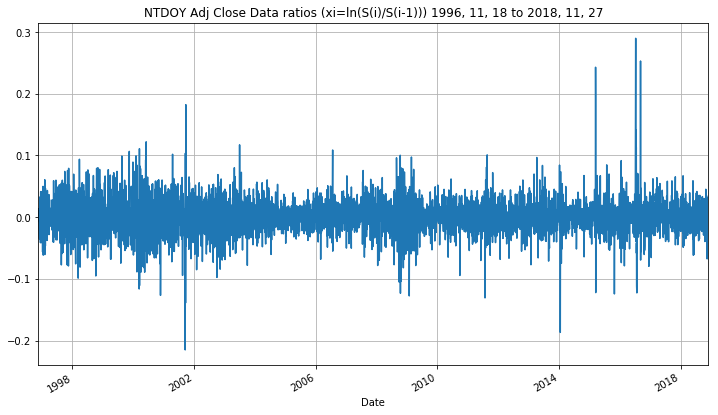

In [15]:
test.plot(grid=True)
plt.title('NTDOY Adj Close Data ratios (xi=ln(S(i)/S(i-1))) 1996, 11, 18 to 2018, 11, 27')
plt.show()

In [3]:
import math as m
xi=[]
for i in range(0,5543):
    xi.append(test[i])
x1=0
for i in xi:
    x1=x1+i**2
x2=x1/len(xi)
mean=sum(xi)/len(xi)
mean=mean**2
volatility=m.sqrt(252)*m.sqrt(len(xi)*(x2-mean)/(len(xi)-1))
print('Volatility =', volatility)

Volatility = 0.43905829569885507


## Cox-Ross-Rubinstein tree

### Building stock tree

In [25]:
import sys
import numpy as np
from math import pow
import math
# create the Binomial Tree

def build_stock_tree(S,T,N,sig):
    dt=T/N;
    u=math.exp(sig*math.sqrt(dt));
    d=math.exp(-sig*math.sqrt(dt));
    tree=np.zeros((N+1,N+1))
    for i in range(N+1):
        for j in range(i+1):
            tree[i][j]=S*pow(u,j)*pow(d,i-j)
           
    
    return(tree)

In [26]:
s = [[str(e) for e in row] for row in build_stock_tree(Current_price,0.5,4,volatility)]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print('\n'.join(table))

37.0              	0.0               	0.0               	0.0               	0.0             
31.680047250334702	43.21331938624355 	0.0               	0.0               	0.0             
27.125010642795658	37.00000000000001 	50.470026280472766	0.0               	0.0             
23.224908617016165	31.680047250334706	43.21331938624355 	58.945334191626344	0.0             
19.885573037075073	27.12501064279566 	37.00000000000001 	50.470026280472766	68.8438798040976


### Building the Cox-Ross-Rubinstein tree

In [53]:
import numpy as np
def CRRTree(type,S0, K, r, sigma,Ldelta, T, N):
   
    #calculate delta T    
    deltaT = float(T) / N
 
    # up and down factor will be constant for the tree so we calculate outside the loop
    u = np.exp(sigma * np.sqrt(deltaT))
    d = np.exp(-sigma * np.sqrt(deltaT))
    
    #to work with vector we need to init the arrays using numpy
    fs =  np.asarray([0.0 for i in range(N + 1)])
        
    #we need the stock tree for calculations of expiration values
    fs2 = np.asarray([(S0 * u**j * d**(N - j)) for j in range(N + 1)])
    
    #we vectorize the strikes as well so the expiration check will be faster
    fs3 =np.asarray( [float(K) for i in range(N + 1)])
    a = np.exp(r * deltaT)
    
    p=((np.exp((r-Ldelta)*deltaT))-d)/(u-d);
    oneMinusP = 1.0 - p
    print(p)

    if type =="C":
        fs[:] = np.maximum(fs2-fs3, 0.0)
    else:
        fs[:] = np.maximum(-fs2+fs3, 0.0)
    
   
    #calculate backward the option prices
    for i in range(N-1, -1, -1):
       fs[:-1]=np.exp(-r * deltaT) * (p * fs[1:] + oneMinusP * fs[:-1])
       fs2[:]=fs2[:]*u
      
                
    # print fs
    return fs[0]

In [58]:
print(CRRTree('C',Current_price, Current_price, r,volatility,Ldelta, 0.5, N=1))

0.43162832195073225
5.75015329548223


### 1 to 9 periods using Cox-Ross-Rubinstein for put option prices

In [29]:
for i in range(1,10):
    print(CRRTree('p',Current_price, Current_price, r,volatility,Ldelta, 0.5, N=i))

5.550985732987845
3.912526904981438
4.8074254771544185
4.155890706828922
4.654228769685962
4.243637755686113
4.588847540998152
4.288644450868489
4.552686527038348


### 100000 to 100009 period using Cox-Ross-Rubinstein for put option prices

In [32]:
for i in range(100000,100010):
    print(CRRTree('P',Current_price, Current_price, r,volatility,Ldelta, 0.5, N=i))

4.427562475493936
4.4275849231754885
4.427562475728777
4.427584922662847
4.427562476047598
4.427584922537167
4.427562476022619
4.427584922495112
4.427562476532915
4.427584922184095


### 1 to 9 period using Cox-Ross-Rubinstein for call option prices

In [31]:
for i in range(1,10):
    print(CRRTree('C',Current_price, Current_price, r,volatility,Ldelta, 0.5, N=i))

5.75015329548223
4.111694467475819
5.006593039648809
4.355058269323318
4.853396332180331
4.442805318180507
4.788015103492518
4.487812013362878
4.751854089532722


### 100000 to 100009 period using Cox-Ross-Rubinstein for call option prices

In [30]:
for i in range(100000,100010):
    print(CRRTree('C',Current_price, Current_price, r,volatility,Ldelta, 0.5, N=i))

4.6267300380144585
4.6267524852964295
4.626730038228505
4.6267524855004325
4.626730038366811
4.626752485113659
4.626730038816596
4.626752484651023
4.626730038829164
4.626752484577381


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
CRR_p=[]
CRR_c=[]
for i in range(1,500):
    CRR_p.append(CRRTree('p',Current_price, Current_price, r,volatility,Ldelta, 0.5, N=i))
for i in range(1,500):
    CRR_c.append(CRRTree('C',Current_price, Current_price, r,volatility,Ldelta, 0.5, N=i))   
    

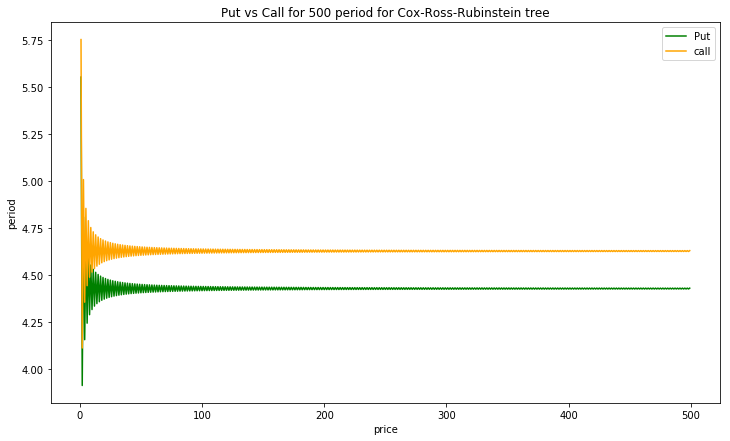

In [36]:
plt.plot(range(1,500), CRR_p, c='g', label='Put')
plt.plot(range(1,500), CRR_c, c='orange', label='call')
plt.xlabel('price')
plt.ylabel('period')
plt.title('Put vs Call for 500 period for Cox-Ross-Rubinstein tree')
plt.legend()
plt.show()

### Building the Log normal tree

#### Building stock tree


In [37]:
def build_stock_tree_for_log_normal(S,T,N,sigma,Ldelta,r):
    dt=T/N;
    u = np.exp((r-Ldelta-(1/2)*sigma*sigma)*dt+sigma*np.sqrt(dt));
    d = np.exp((r-Ldelta-(1/2)*sigma*sigma)*dt-sigma*np.sqrt(dt));
    tree=np.zeros((N+1,N+1))
    for i in range(N+1):
        for j in range(i+1):
            tree[i][j]=S*pow(u,j)*pow(d,i-j)
           
    
    return(tree)

s = [[str(e) for e in row] for row in build_stock_tree_for_log_normal(Current_price,0.5,4,volatility,Ldelta,r)]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print('\n'.join(table))

37.0              	0.0               	0.0              	0.0               	0.0              
31.343149905239166	42.75377295757345 	0.0              	0.0               	0.0              
26.551163404926864	36.217240941183384	49.40230005696593	0.0               	0.0              
22.49181337186819 	30.68006518847773 	41.8492890905159 	57.08472216803891 	0.0              
19.053088598787234	25.989456278512627	35.45104165923595	48.357162275993865	65.96181759239178


### Price tree for put and call (Log normal)

In [4]:
import numpy as np
def LogNormalTree(type,S0, K, r, sigma,Ldelta, T, N):
    
   
    #calculate delta T    
    deltaT = float(T) / N
 
    # up and down factor will be constant for the tree so we calculate outside the loop
   
    u = np.exp((r-Ldelta-(1/2)*sigma*sigma)*deltaT+sigma*np.sqrt(deltaT));
    d = np.exp((r-Ldelta-(1/2)*sigma*sigma)*deltaT-sigma*np.sqrt(deltaT));
    
    
    #to work with vector we need to init the arrays using numpy
    fs =  np.asarray([0.0 for i in range(N + 1)])
        
    #we need the stock tree for calculations of expiration values
    fs2 = np.asarray([(S0 * u**j * d**(N - j)) for j in range(N + 1)])
    
    #we vectorize the strikes as well so the expiration check will be faster
    fs3 =np.asarray( [float(K) for i in range(N + 1)])
    
 
   
    a = np.exp(r * deltaT)
    p=((np.exp((r-Ldelta)*deltaT))-d)/(u-d);
    oneMinusP = 1.0 - p
 
   
   
    if type =="C":
        fs[:] = np.maximum(fs2-fs3, 0.0)
    else:
        fs[:] = np.maximum(-fs2+fs3, 0.0)
    
   
    #calculate backward the option prices
    for i in range(N-1, -1, -1):
       fs[:-1]=np.exp(-r * deltaT) * (p * fs[1:] + oneMinusP * fs[:-1])
       fs2[:]=fs2[:]*u
      
       
                
    # print fs
    return fs[0]

### 1 to 9 periods using Log normal for put option prices

In [39]:
for i in range(1,10):
    print(LogNormalTree('p',Current_price, Current_price, r,volatility,Ldelta, 0.5, N=i))

5.4311071819904395
4.25760415424375
4.742222911588577
4.403133730123513
4.598560494055691
4.442254621233452
4.537110552681642
4.456954521878634
4.503092720593405


### 100000 to 100009 periods using Log normal for put option prices

In [40]:
for i in range(100000,100010):
    print(LogNormalTree('p',Current_price, Current_price, r,volatility,Ldelta, 0.5, N=i))

4.4275773968652965
4.427580074757706
4.427577385880092
4.427580082922271
4.427577374946007
4.427580091538743
4.42757736366065
4.427580100155761
4.427577352876826
4.427580108519727


### 1 to 9 periods using Log normal for call option prices

In [41]:
for i in range(1,10):
    print(LogNormalTree('C',Current_price, Current_price, r,volatility,Ldelta, 0.5, N=i))

5.630274744484825
4.456771716738132
4.9413904740829695
4.602301292617906
4.797728056550064
4.641422183727843
4.736278115176005
4.656122084373023
4.702260283087781


### 100000 to 100009 periods using Log normal for call option prices

In [42]:
for i in range(100000,100010):
    print(LogNormalTree('C',Current_price, Current_price, r,volatility,Ldelta, 0.5, N=i))

4.6267449593851735
4.62674763687875
4.626744948379529
4.626747645759001
4.626744937265348
4.626747654116349
4.62674492645451
4.62674766231179
4.626744915172341
4.626747670913005


In [45]:
Ln_p=[]
Ln_c=[]
for i in range(1,500):
    Ln_p.append(LogNormalTree('p',Current_price, Current_price, r,volatility,Ldelta, 0.5, N=i))
for i in range(1,500):
    Ln_c.append(LogNormalTree('C',Current_price, Current_price, r,volatility,Ldelta, 0.5, N=i))   
    


### Put vs Call for 500 period for Log normal tree

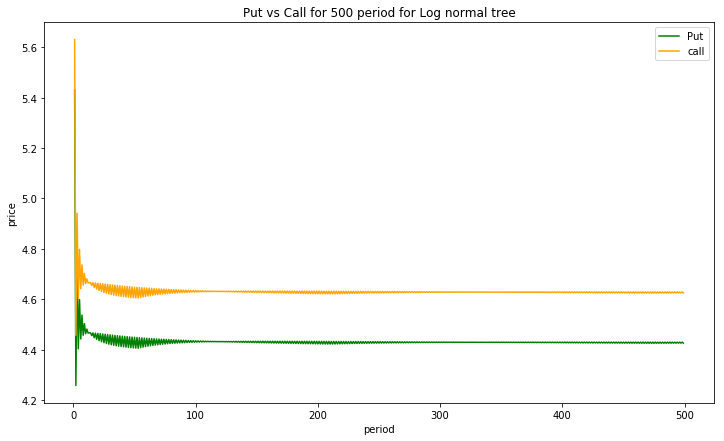

In [46]:
plt.plot(range(1,500), Ln_p, c='g', label='Put')
plt.plot(range(1,500), Ln_c, c='orange', label='call')
plt.xlabel('period')
plt.ylabel('price')
plt.title('Put vs Call for 500 period for Log normal tree')
plt.legend()
plt.show()

### Put vs Call for 500 period for Cox-Ross-Rubinstein and Log normal

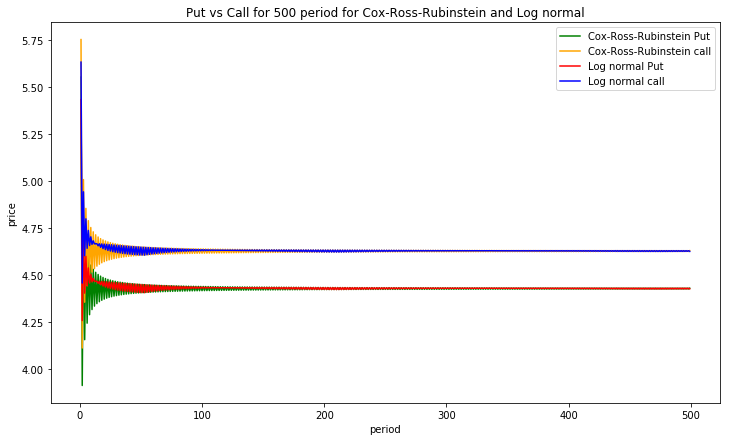

In [47]:
plt.plot(range(1,500), CRR_p, c='g', label='Cox-Ross-Rubinstein Put')
plt.plot(range(1,500), CRR_c, c='orange', label='Cox-Ross-Rubinstein call')
plt.plot(range(1,500), Ln_p, c='red', label='Log normal Put')
plt.plot(range(1,500), Ln_c, c='blue', label='Log normal call')
plt.xlabel('period')
plt.ylabel('price')
plt.title('Put vs Call for 500 period for Cox-Ross-Rubinstein and Log normal')
plt.legend()
plt.show()

In [7]:
print(LogNormalTree('C',Current_price, Current_price, r,volatility,Ldelta, 0.5, N=150))

4.626750850275347
